Generated 1000 samples
Shape: (1000, 2)
Cluster distribution: [500 500]


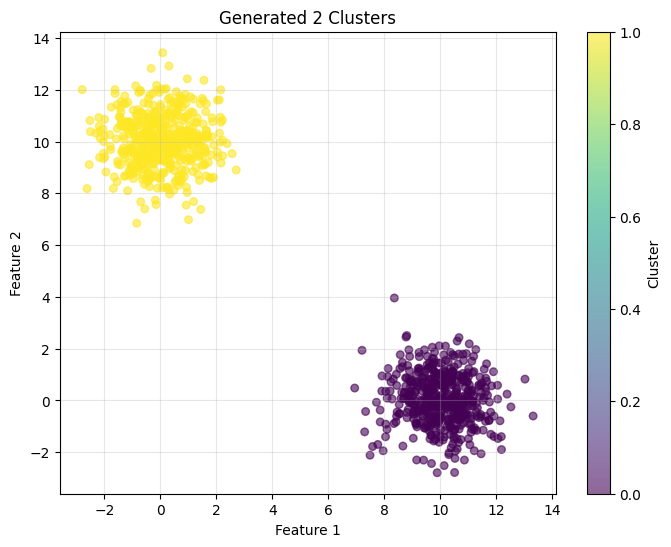

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from pyod.models.knn import KNN
from pyod.models.lof import LOF
# Generate 2 clusters with custom parameters

X, y = make_blobs(
    n_samples=[500,500],
    random_state=1,
    centers=[(10, 0), (0, 10)]
)

print(f"Generated {len(X)} samples")
print(f"Shape: {X.shape}")
print(f"Cluster distribution: {np.bincount(y)}")
# Visualize the generated clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30, alpha=0.6)
plt.title('Generated 2 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

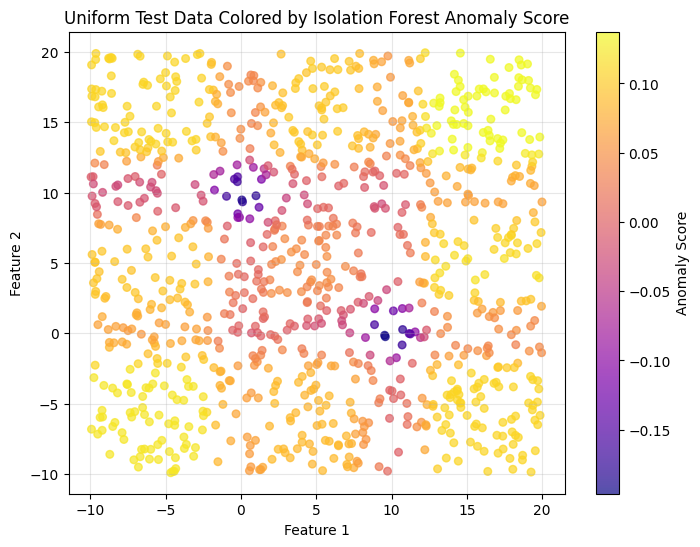

In [4]:
from pyod.models.iforest import IForest

contamination = 0.02
clf = IForest(contamination=contamination, random_state=1)
clf.fit(X)

test_data = np.random.uniform(low=-10, high=20, size=(1000, 2))

test_scores = clf.decision_function(test_data)

plt.figure(figsize=(8, 6))
sc = plt.scatter(test_data[:, 0], test_data[:, 1], c=test_scores, cmap='plasma', s=30, alpha=0.7)
plt.title('Uniform Test Data Colored by Isolation Forest Anomaly Score')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(sc, label='Anomaly Score')
plt.grid(True, alpha=0.3)
plt.show()

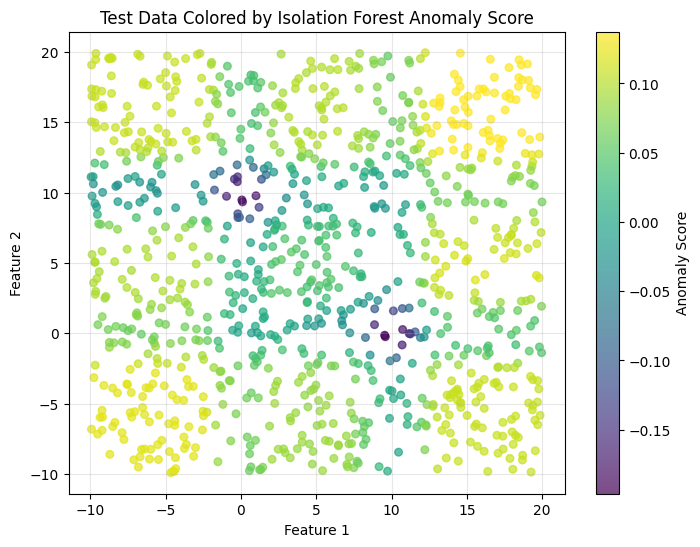

In [ ]:
#diff color for visibility
plt.figure(figsize=(8, 6))
sc = plt.scatter(test_data[:, 0], test_data[:, 1], c=test_scores, cmap='viridis', s=30, alpha=0.7)
plt.title('Test Data Colored by Isolation Forest Anomaly Score')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(sc, label='Anomaly Score')
plt.grid(True, alpha=0.3)
plt.show()


e:\master\AnomalyDetection\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
e:\master\AnomalyDetection\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
e:\master\AnomalyDetection\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
e:\master\AnomalyDetection\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
e:\master\AnomalyDetection\.venv\Lib\site-packages\torch\utils\data\

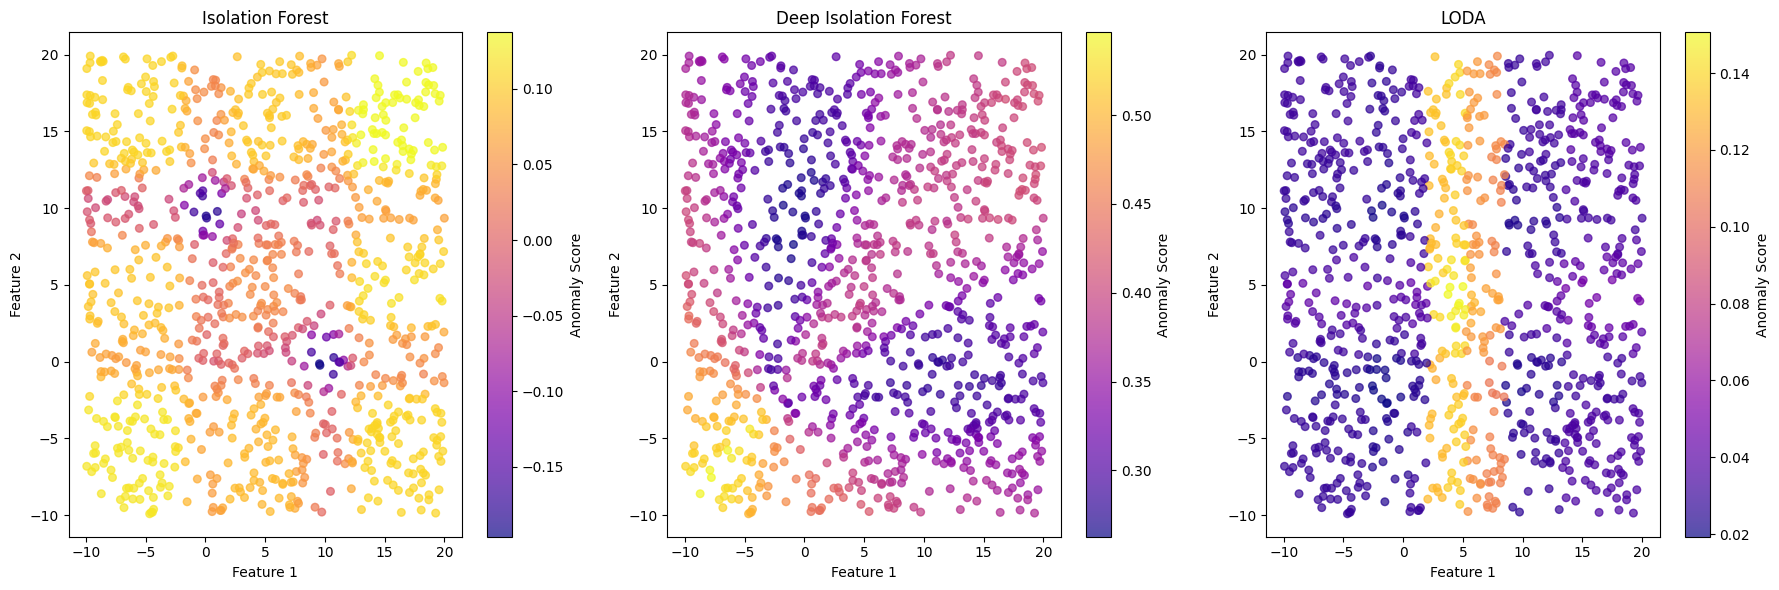

In [13]:
# Compare Isolation Forest, Deep Isolation Forest, and LODA on test data
from pyod.models.dif import DIF
from pyod.models.loda import LODA

# Fit DIF model
dif = DIF(contamination=contamination, random_state=1)
dif.fit(X)
dif_scores = dif.decision_function(test_data)

# Fit LODA model
loda = LODA(contamination=contamination)
loda.fit(X)
loda_scores = loda.decision_function(test_data)

# Plot all three 
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sc0 = axes[0].scatter(test_data[:, 0], test_data[:, 1], c=test_scores, cmap='plasma', s=30, alpha=0.7)
axes[0].set_title('Isolation Forest')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
plt.colorbar(sc0, ax=axes[0], label='Anomaly Score')

sc1 = axes[1].scatter(test_data[:, 0], test_data[:, 1], c=dif_scores, cmap='plasma', s=30, alpha=0.7)
axes[1].set_title('Deep Isolation Forest')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
plt.colorbar(sc1, ax=axes[1], label='Anomaly Score')

sc2 = axes[2].scatter(test_data[:, 0], test_data[:, 1], c=loda_scores, cmap='plasma', s=30, alpha=0.7)
axes[2].set_title('LODA')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')
plt.colorbar(sc2, ax=axes[2], label='Anomaly Score')

plt.tight_layout()
plt.show()

e:\master\AnomalyDetection\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
e:\master\AnomalyDetection\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
e:\master\AnomalyDetection\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
e:\master\AnomalyDetection\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
e:\master\AnomalyDetection\.venv\Lib\site-packages\torch\utils\data\

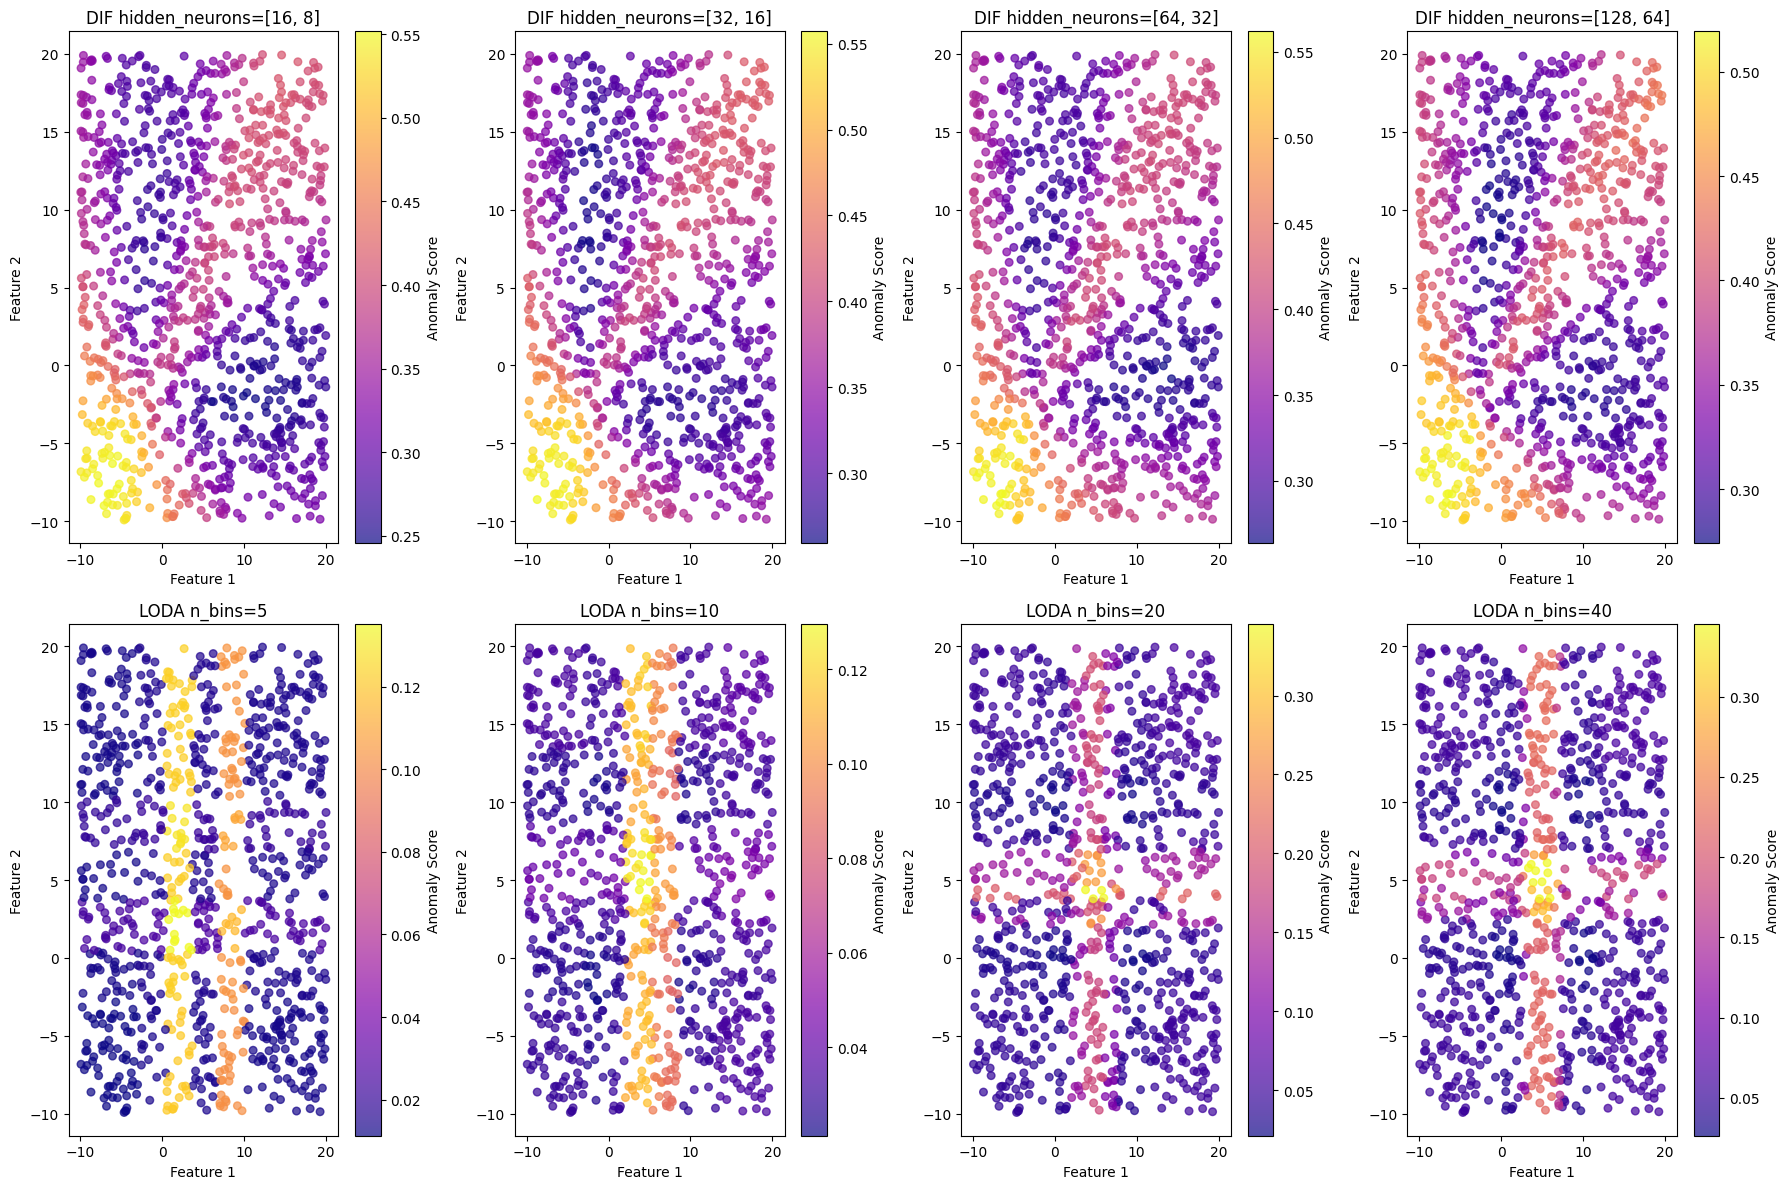

In [12]:
# Experiment with different DIF hidden layer sizes and LODA bin counts
dif_configs = [[16, 8], [32, 16], [64, 32],[128, 64]]
loda_bins = [5, 10, 20, 40]

fig, axes = plt.subplots(2, 4, figsize=(18, 12))

# DIF experiments
for idx, hidden in enumerate(dif_configs):
    dif = DIF(contamination=contamination, hidden_neurons=hidden, random_state=1)
    dif.fit(X)
    dif_scores = dif.decision_function(test_data)
    sc = axes[0, idx].scatter(test_data[:, 0], test_data[:, 1], c=dif_scores, cmap='plasma', s=30, alpha=0.7)
    axes[0, idx].set_title(f'DIF hidden_neurons={hidden}')
    axes[0, idx].set_xlabel('Feature 1')
    axes[0, idx].set_ylabel('Feature 2')
    plt.colorbar(sc, ax=axes[0, idx], label='Anomaly Score')

# LODA experiments
for idx, bins in enumerate(loda_bins):
    loda = LODA(contamination=contamination, n_bins=bins)
    loda.fit(X)
    loda_scores = loda.decision_function(test_data)
    sc = axes[1, idx].scatter(test_data[:, 0], test_data[:, 1], c=loda_scores, cmap='plasma', s=30, alpha=0.7)
    axes[1, idx].set_title(f'LODA n_bins={bins}')
    axes[1, idx].set_xlabel('Feature 1')
    axes[1, idx].set_ylabel('Feature 2')
    plt.colorbar(sc, ax=axes[1, idx], label='Anomaly Score')

plt.tight_layout()
plt.show()

Generated 1000 samples (3D)
Shape: (1000, 3)
Cluster distribution: [500 500]


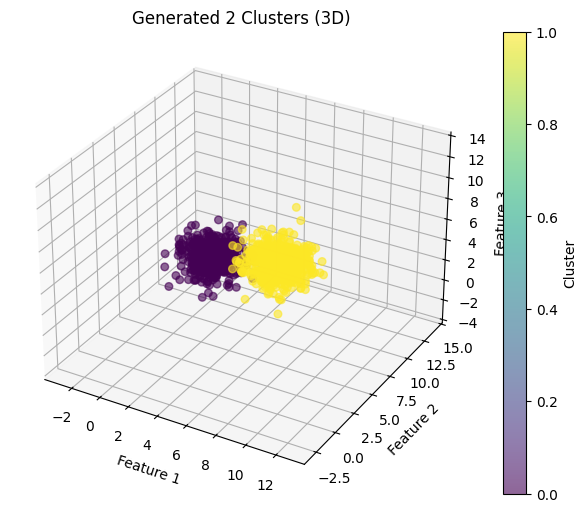

e:\master\AnomalyDetection\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
e:\master\AnomalyDetection\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
e:\master\AnomalyDetection\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
e:\master\AnomalyDetection\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
e:\master\AnomalyDetection\.venv\Lib\site-packages\torch\utils\data\

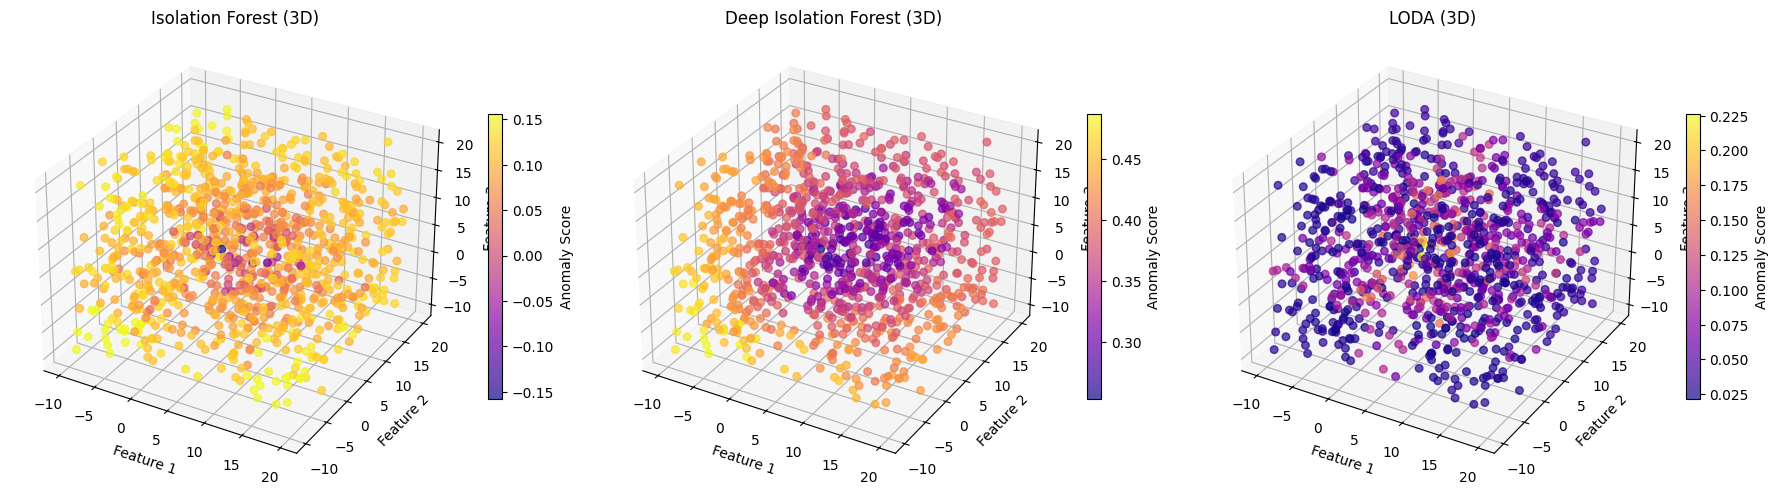

In [ ]:
X_3d, y_3d = make_blobs(
    n_samples=[500, 500],
    random_state=1,
    centers=[(0, 10, 0), (10, 0, 10)],
    cluster_std=1
    )

print(f"Generated {len(X_3d)} samples (3D)")
print(f"Shape: {X_3d.shape}")
print(f"Cluster distribution: {np.bincount(y_3d)}")

# Visualize the generated clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y_3d, cmap='viridis', s=30, alpha=0.6)
ax.set_title('Generated 2 Clusters (3D)')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.colorbar(sc, label='Cluster')
plt.show()

# Fit models and score uniform test data in 3D
test_data_3d = np.random.uniform(low=-10, high=20, size=(1000, 3))

clf_3d = IForest(contamination=contamination, random_state=1)
clf_3d.fit(X_3d)
test_scores_3d = clf_3d.decision_function(test_data_3d)

dif_3d = DIF(contamination=contamination, random_state=1)
dif_3d.fit(X_3d)
dif_scores_3d = dif_3d.decision_function(test_data_3d)

loda_3d = LODA(contamination=contamination)
loda_3d.fit(X_3d)
loda_scores_3d = loda_3d.decision_function(test_data_3d)

# Plot anomaly scores for all three models in 3D
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(131, projection='3d')
sc1 = ax1.scatter(test_data_3d[:, 0], test_data_3d[:, 1], test_data_3d[:, 2], c=test_scores_3d, cmap='plasma', s=30, alpha=0.7)
ax1.set_title('Isolation Forest (3D)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')
plt.colorbar(sc1, ax=ax1, shrink=0.5, label='Anomaly Score')

ax2 = fig.add_subplot(132, projection='3d')
sc2 = ax2.scatter(test_data_3d[:, 0], test_data_3d[:, 1], test_data_3d[:, 2], c=dif_scores_3d, cmap='plasma', s=30, alpha=0.7)
ax2.set_title('Deep Isolation Forest (3D)')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Feature 3')
plt.colorbar(sc2, ax=ax2, shrink=0.5, label='Anomaly Score')

ax3 = fig.add_subplot(133, projection='3d')
sc3 = ax3.scatter(test_data_3d[:, 0], test_data_3d[:, 1], test_data_3d[:, 2], c=loda_scores_3d, cmap='plasma', s=30, alpha=0.7)
ax3.set_title('LODA (3D)')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.set_zlabel('Feature 3')
plt.colorbar(sc3, ax=ax3, shrink=0.5, label='Anomaly Score')

plt.tight_layout()
plt.show()